# Explore Significance Annotations

In [1]:
library(magrittr)
library(ggplot2)
library(ggprism)
library(ggsignif)
library(rstatix)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [2]:
head(mpg, 2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [3]:
p <- ggplot(mpg, aes(drv, hwy)) + geom_boxplot()

## Basic Plot

### ggprism

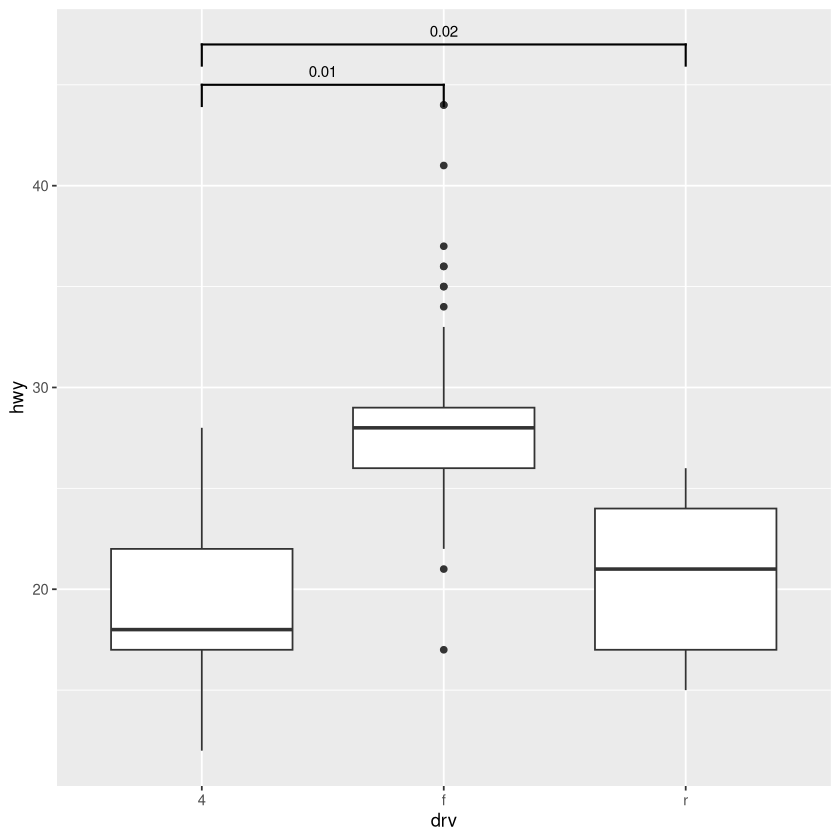

In [4]:
p_values_df <- data.frame(
    group1 = c("4", "4"),
    group2 = c("f", "r"),
    p = c(0.01, 0.02),
    y.position = c(45, 47)
)

p + add_pvalue(p_values_df)

### ggsignif

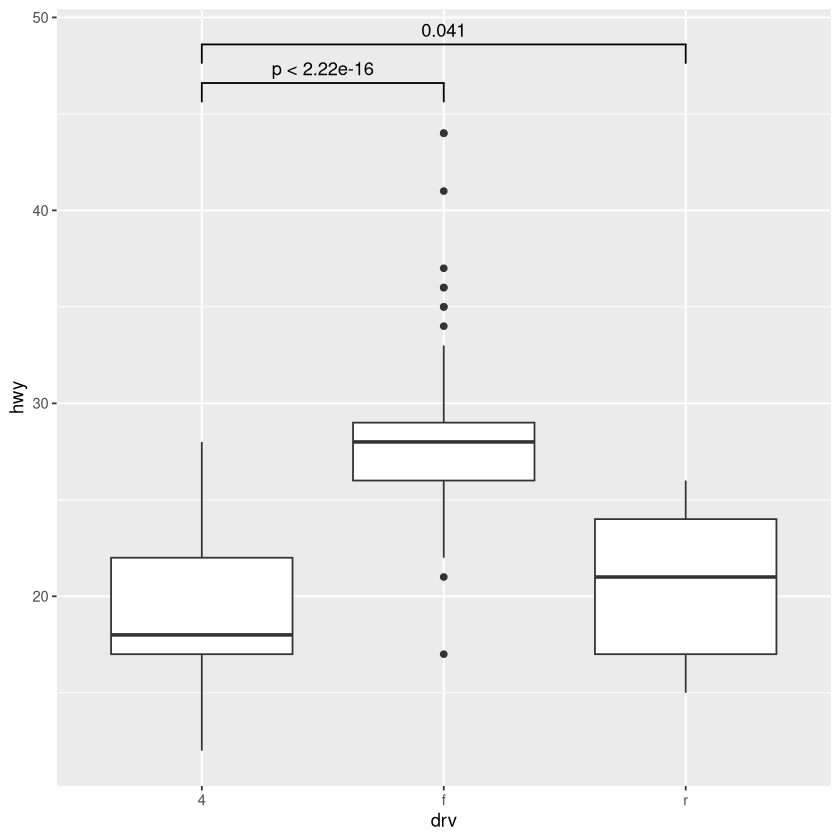

In [5]:
p + geom_signif(
    comparisons = list(
        c("4", "f"),
        c("4", "r")
    ),
    y_position = c(45, 47)
)

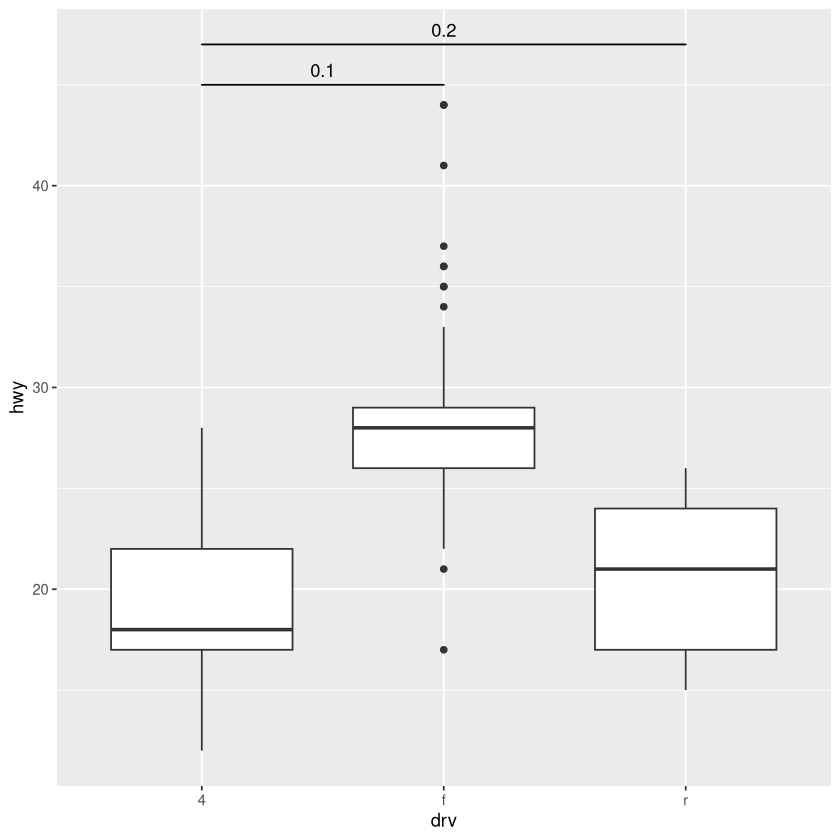

In [6]:
identity_df <- data.frame(
    x = c("4", "4"),
    xend = c("f", "r"),
    y = c(45, 47),
    yend = c(45, 47),
    a = c(0.1, 0.2)
)

p + geom_signif(
    mapping = aes(x = x, xend = xend, y = y, yend = yend, annotation = a),
    data = identity_df,
    stat = "identity"
)

## Custom Column Names

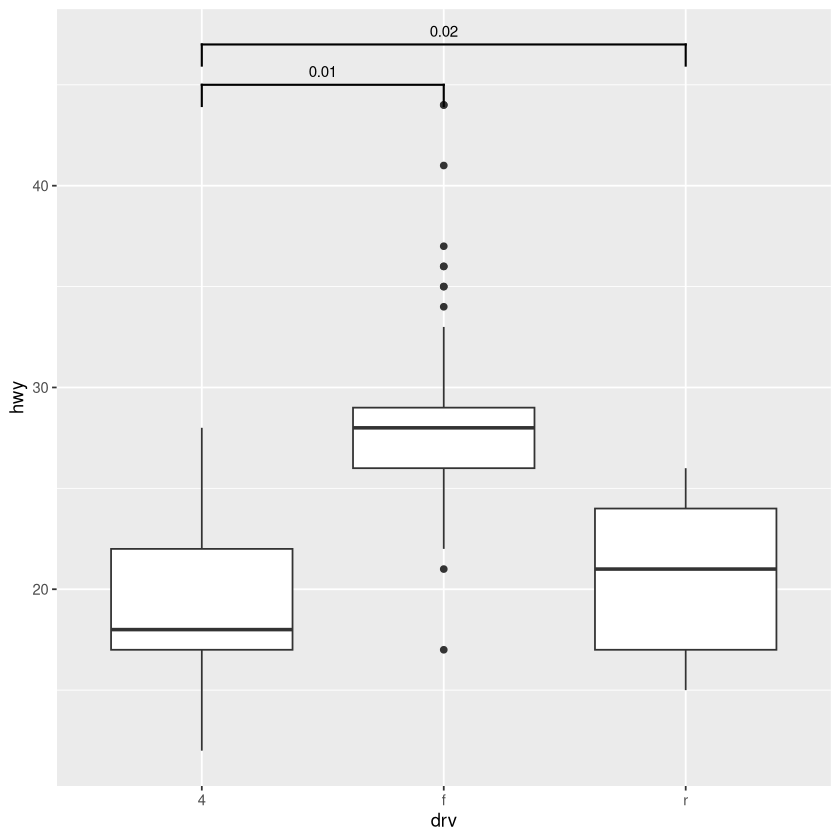

In [7]:
p_values_custom_df <- data.frame(
    a = c("4", "4"),
    b = c("f", "r"),
    c = c(0.01, 0.02),
    d = c(45, 47)
)

p + add_pvalue(p_values_custom_df, xmin = "a", xmax = "b", label = "c", y.position = "d")

## Brackets Between Groups

### Calculate p-values

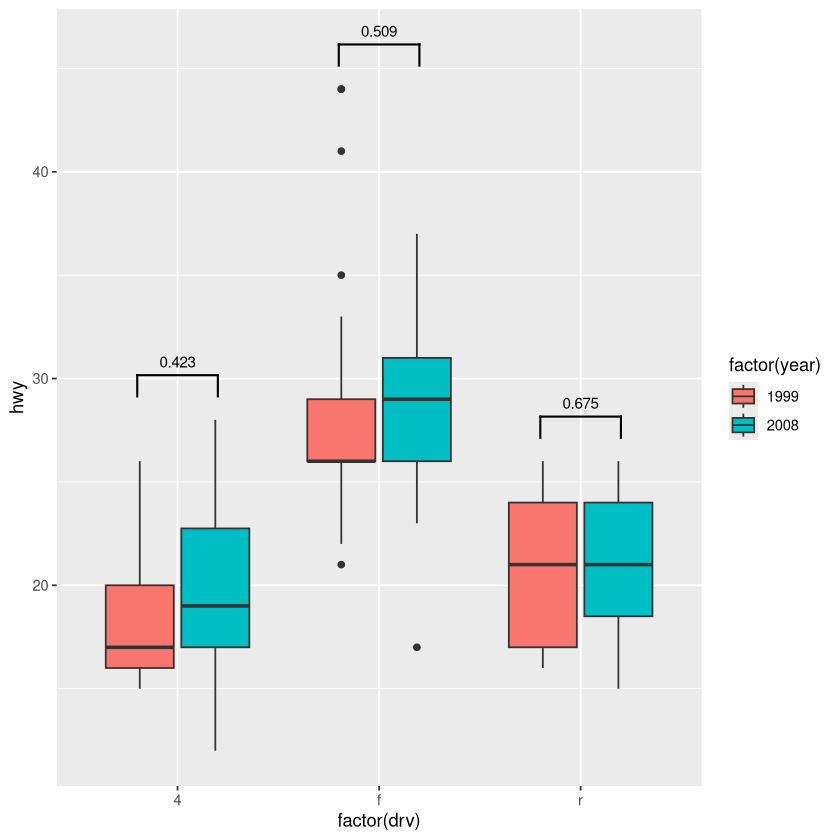

In [8]:
subgroup_p_values_df <- mpg %>%
  rstatix::group_by(drv) %>%
  rstatix::t_test(hwy ~ year) %>%
  rstatix::adjust_pvalue(p.col = "p", method = "bonferroni") %>%
  rstatix::add_significance(p.col = "p.adj") %>% 
  rstatix::add_xy_position(x = "drv", dodge = 0.8)
# as.data.frame(subgroup_p_values_df)

ggplot(mpg, aes(x = factor(drv), y = hwy)) +
    geom_boxplot(aes(fill = factor(year))) +
    add_pvalue(subgroup_p_values_df, xmin = "xmin", xmax = "xmax", label = "{p}")

### Custom dataframe

#### ggprism

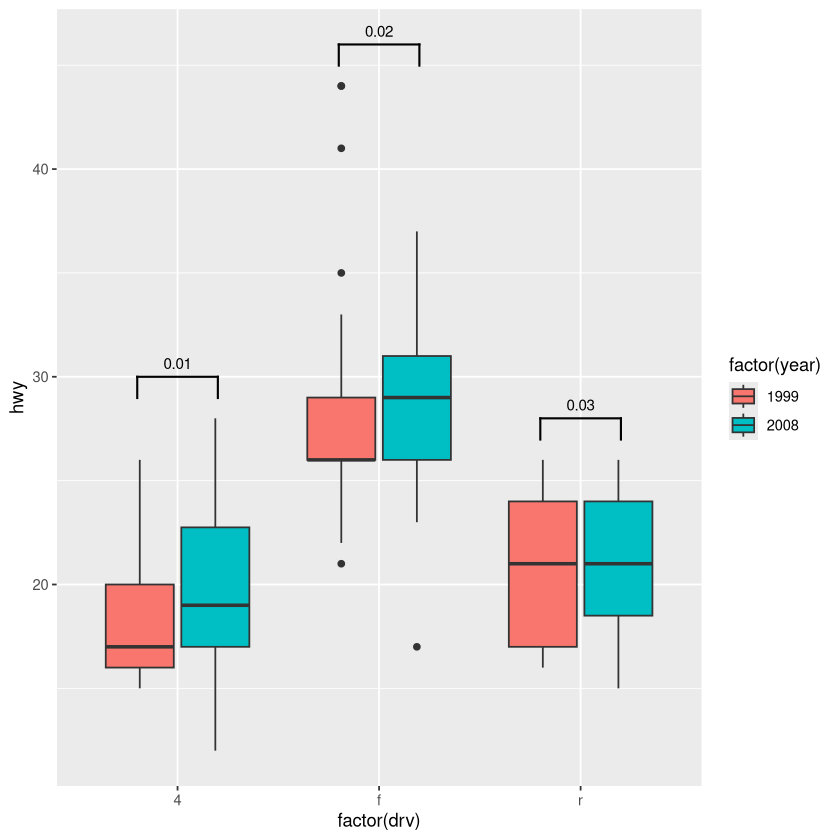

In [9]:
subgroup_p_values_custom_df <- data.frame(
    a = c(0.8, 1.8, 2.8),
    b = c(1.2, 2.2, 3.2),
    c = c(0.01, 0.02, 0.03),
    d = c(30, 46, 28)
)

ggplot(mpg, aes(x = factor(drv), y = hwy)) +
    geom_boxplot(aes(fill = factor(year))) +
    add_pvalue(subgroup_p_values_custom_df, xmin = "a", xmax = "b", label = "c", y.position = "d")

#### ggsignif

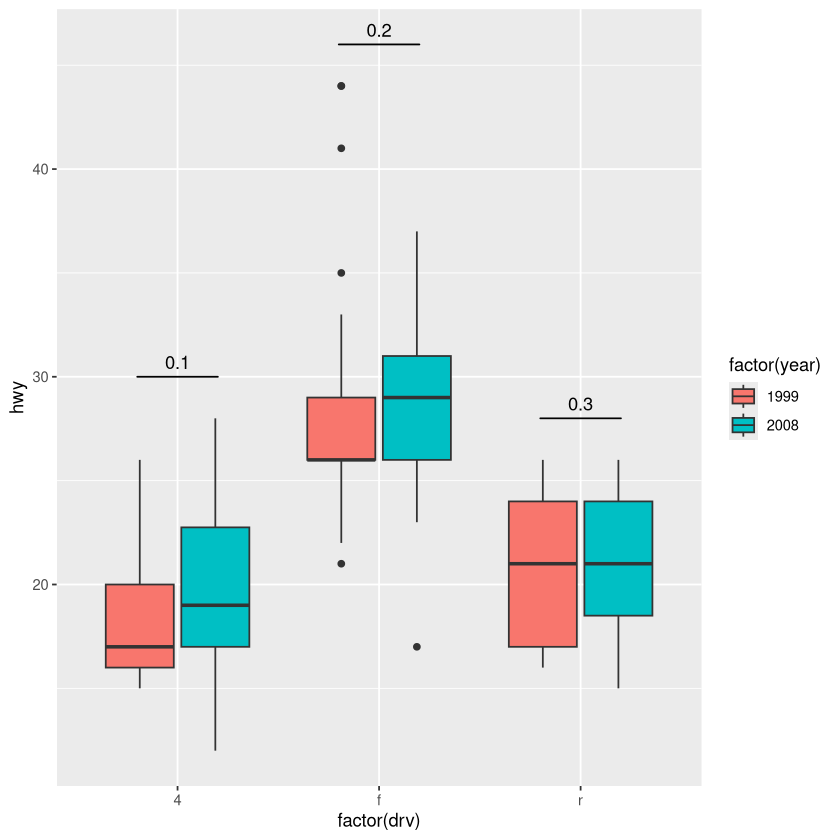

In [10]:
subgroup_p_values_identity_df <- data.frame(
    x = c(0.8, 1.8, 2.8),
    xend = c(1.2, 2.2, 3.2),
    y = c(30, 46, 28),
    yend = c(30, 46, 28),
    a = c(0.1, 0.2, 0.3)
)

ggplot(mpg, aes(x = factor(drv), y = hwy)) +
    geom_boxplot(aes(fill = factor(year))) +
    geom_signif(
        mapping = aes(x = x, xend = xend, y = y, yend = yend, annotation = a, group = a),
        data = subgroup_p_values_identity_df,
        stat = "identity"
    )

## Parameters

### `x`

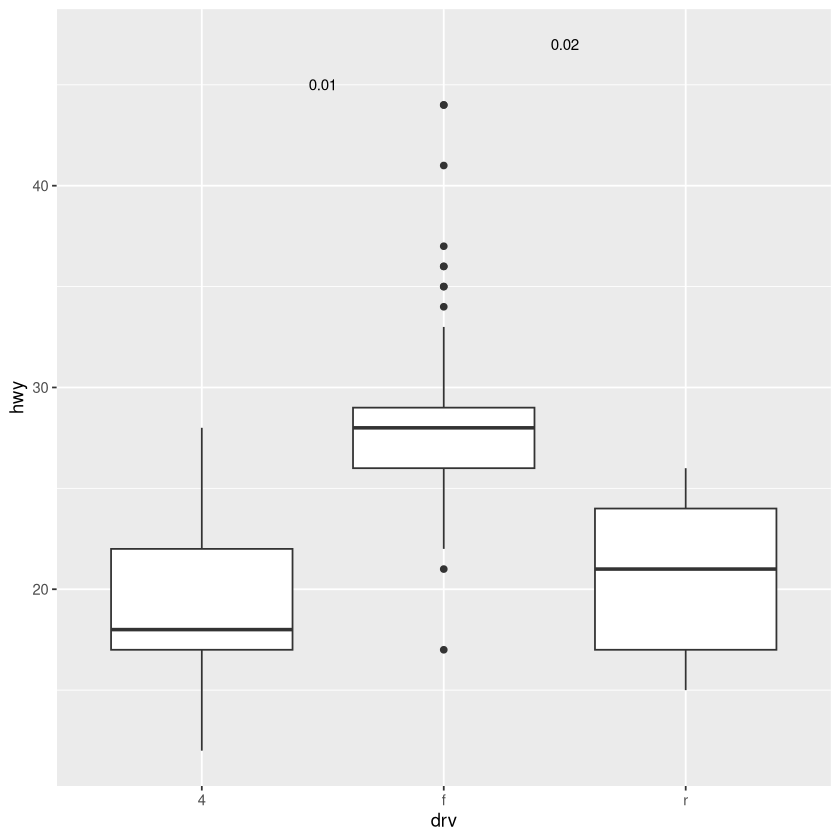

In [11]:
p_values_x_df <- data.frame(
    group1 = c("4", "4"),
    group2 = c("f", "r"),
    p = c(0.01, 0.02),
    y.position = c(45, 47),
    custom_x = c(1.5, 2.5)
)

p + add_pvalue(p_values_x_df, x = "custom_x")

### `step.group.by`

In [12]:
groups_df <- data.frame(
    cat = c("A", "A", "B", "B"),
    min = c(-3, -1, -4, 0),
    lower = c(-2, 0, -3, 1),
    middle = c(-1, 1, -2, 2),
    upper = c(0, 2, -1, 3),
    max = c(1, 3, 0, 4),
    group = c("X", "Y", "X", "Y")
)

groups_plot <- ggplot(groups_df) + geom_boxplot(aes(x = cat, ymin = min, lower = lower, middle = middle, upper = upper, ymax = max, fill = group), stat = "identity")

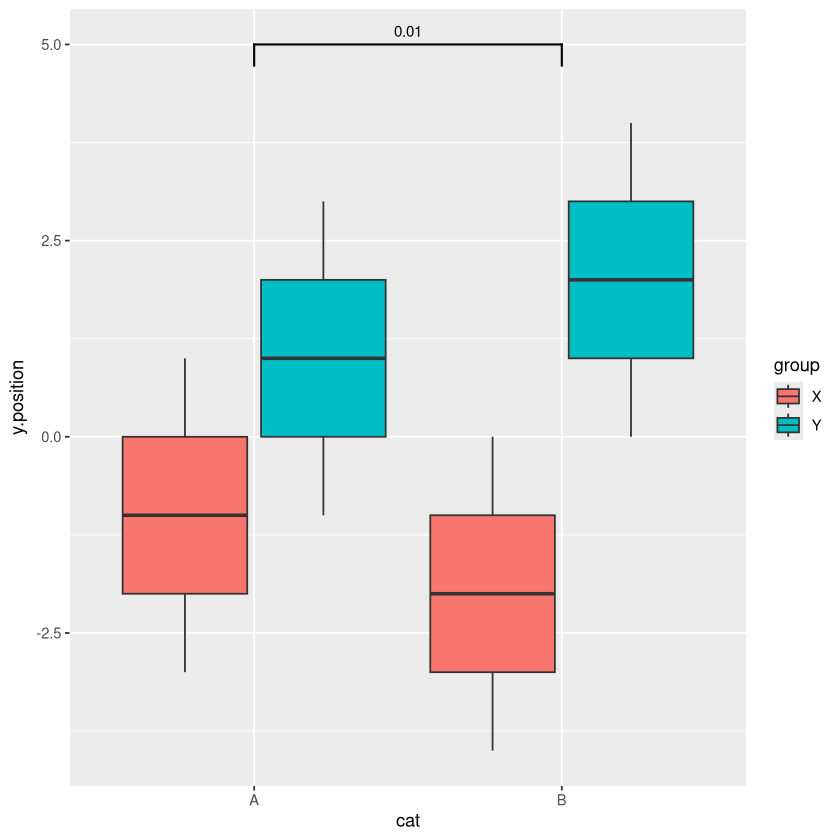

In [13]:
p_values_groups_df <- data.frame(
    group1 = c("A"),
    group2 = c("B"),
    p = c(0.01),
    y.position = c(5)
)

groups_plot + add_pvalue(p_values_groups_df)

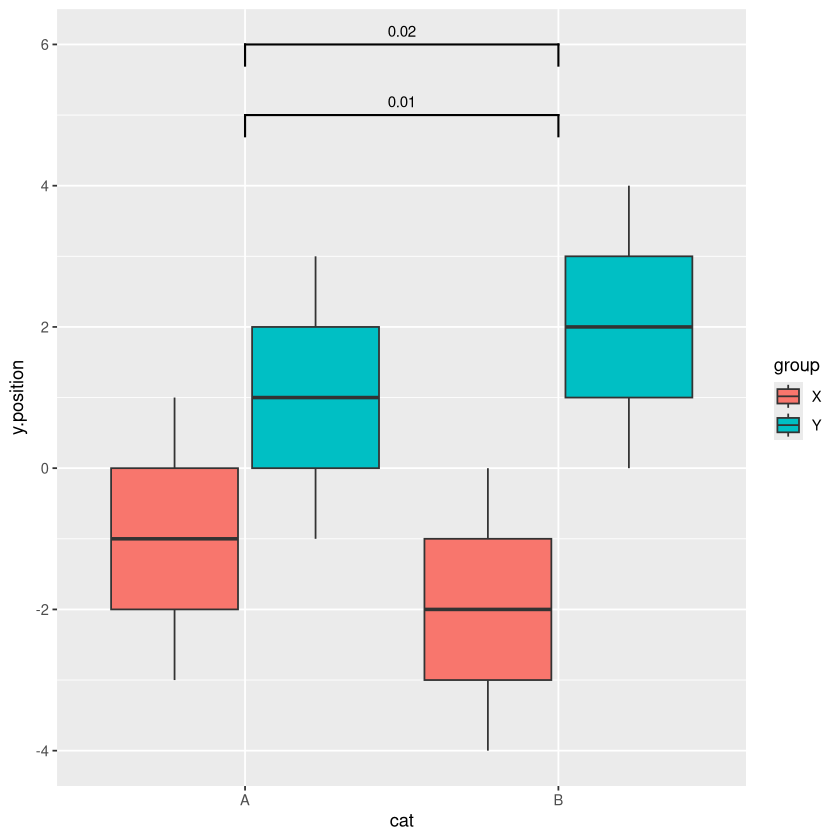

In [14]:
p_values_groups_df <- data.frame(
    group1 = c("A", "A"),
    group2 = c("B", "B"),
    p = c(0.01, 0.02),
    y.position = c(5, 6),
    xy_group = c("X", "Y")
)

groups_plot + add_pvalue(p_values_groups_df, step.group.by = "xy_group")

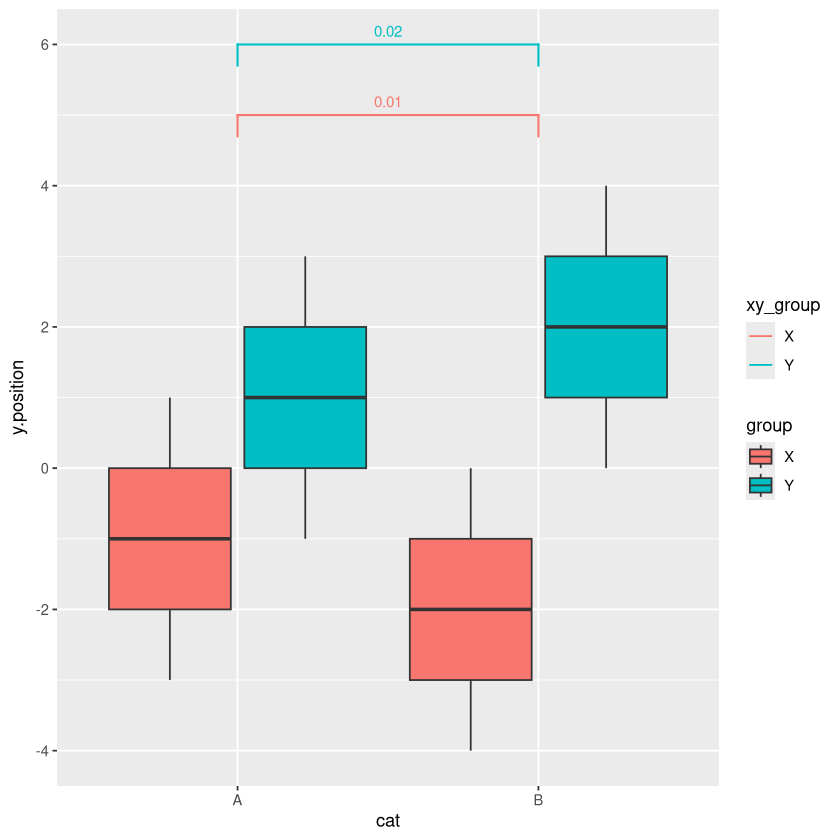

In [15]:
groups_plot + add_pvalue(p_values_groups_df, step.group.by = "xy_group", colour = "xy_group")

### `remove.bracket`

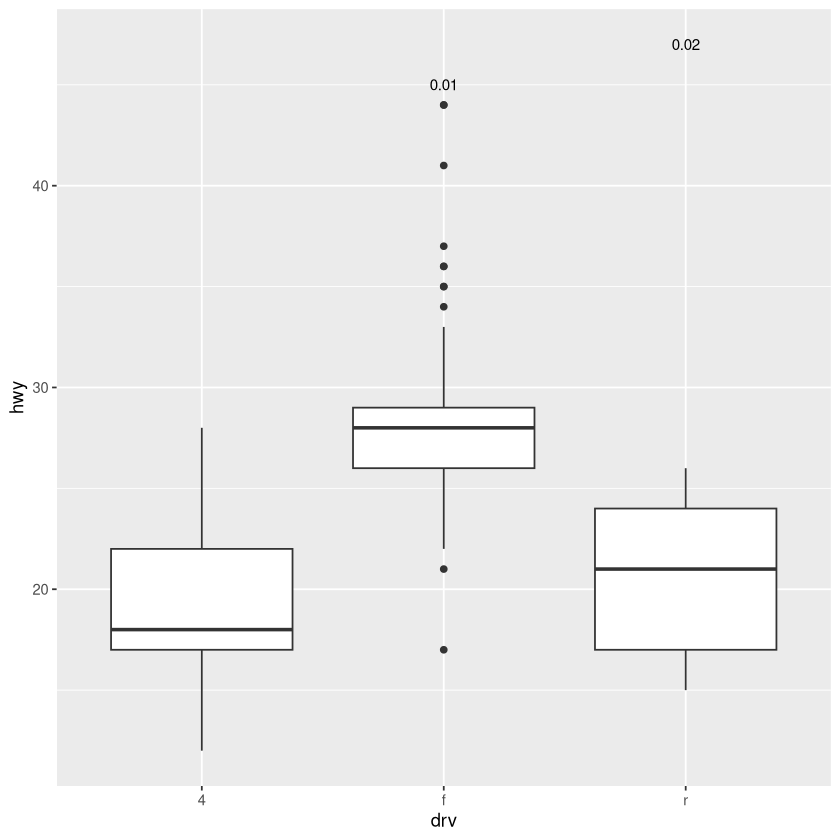

In [16]:
p + add_pvalue(p_values_df, remove.bracket = TRUE)

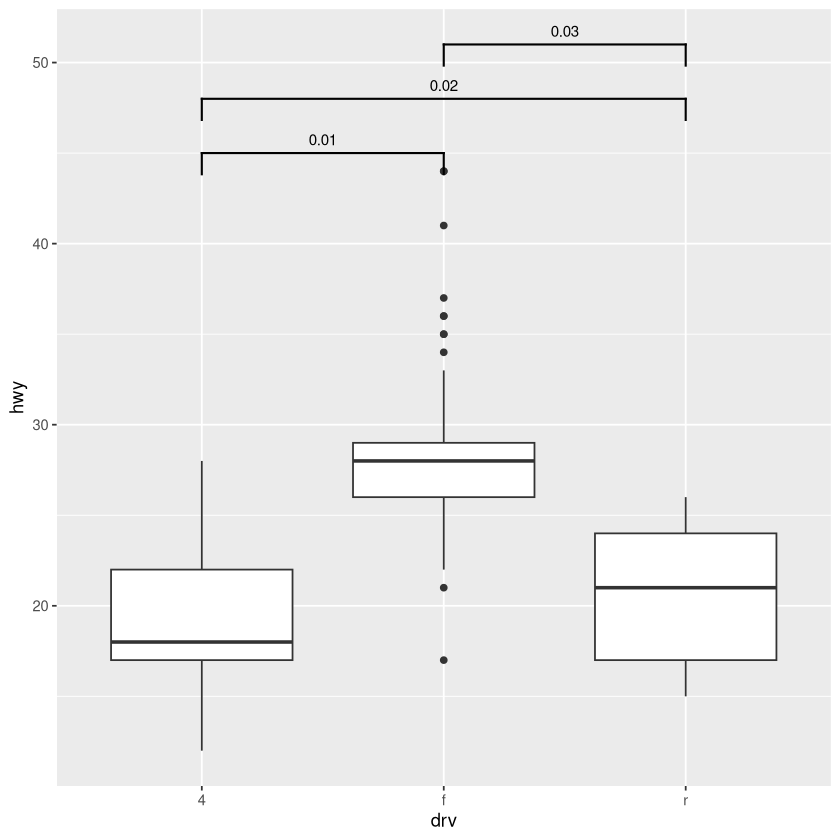

In [17]:
# remove.bracket works not always: https://csdaw.github.io/ggprism/articles/pvalues.html#basic-use-no-brackets

p_values_full_df <- data.frame(
    group1 = c("4", "4", "f"),
    group2 = c("f", "r", "r"),
    p = c(0.01, 0.02, 0.03),
    y.position = c(45, 48, 51)
)

p + add_pvalue(p_values_full_df, remove.bracket = TRUE)

## `coord.flip`

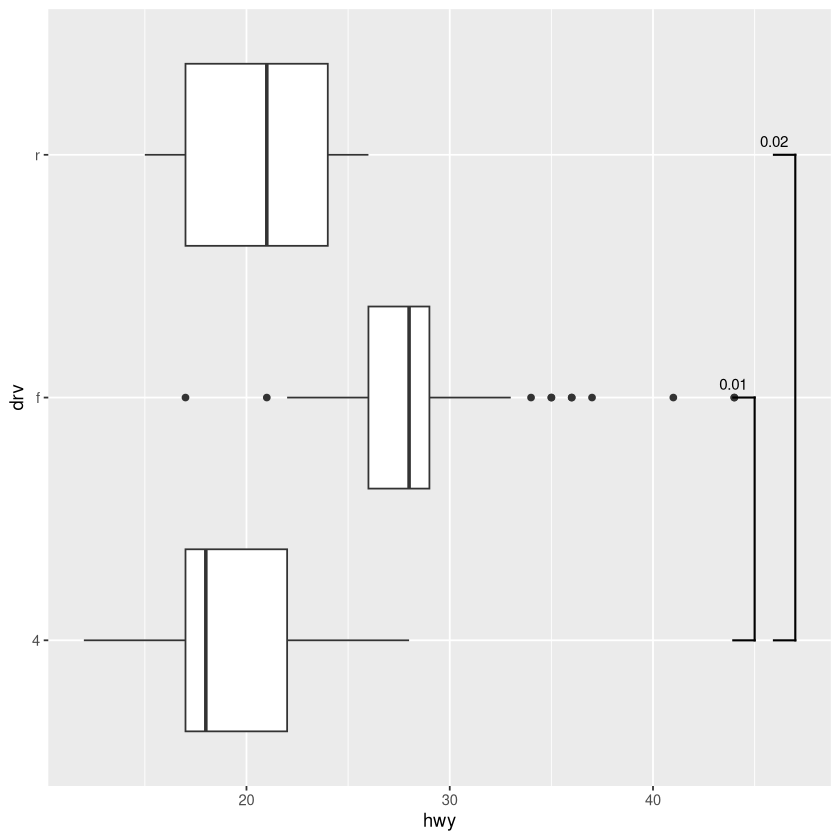

In [18]:
# Texts are not flipped by default

p + coord_flip() + add_pvalue(p_values_df)

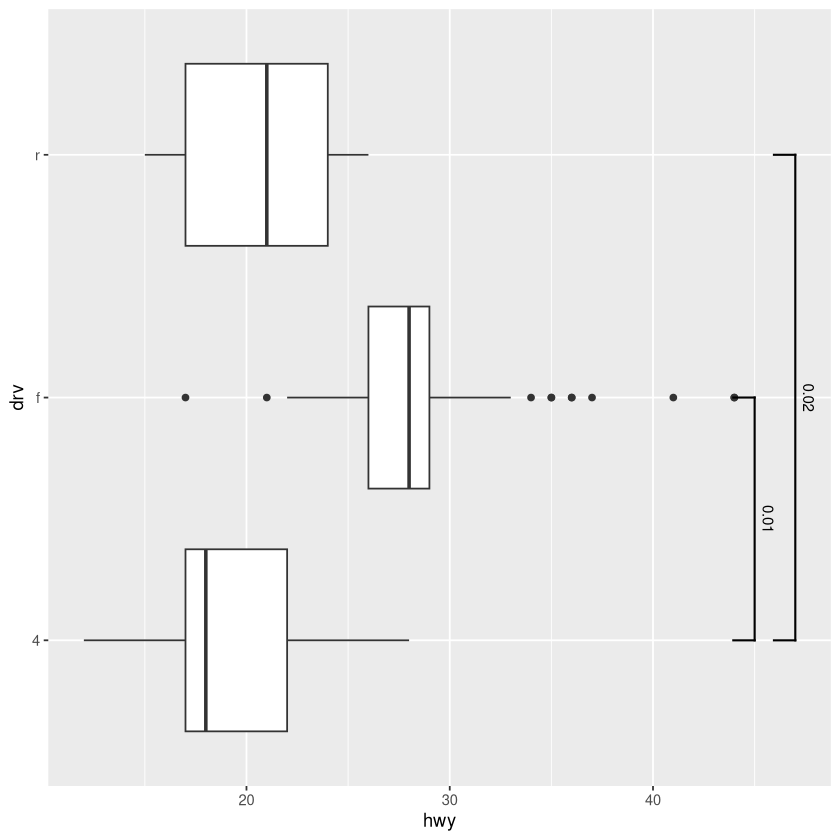

In [19]:
p + coord_flip() + add_pvalue(p_values_df, coord.flip = TRUE)

### Appearance

#### `label.size`

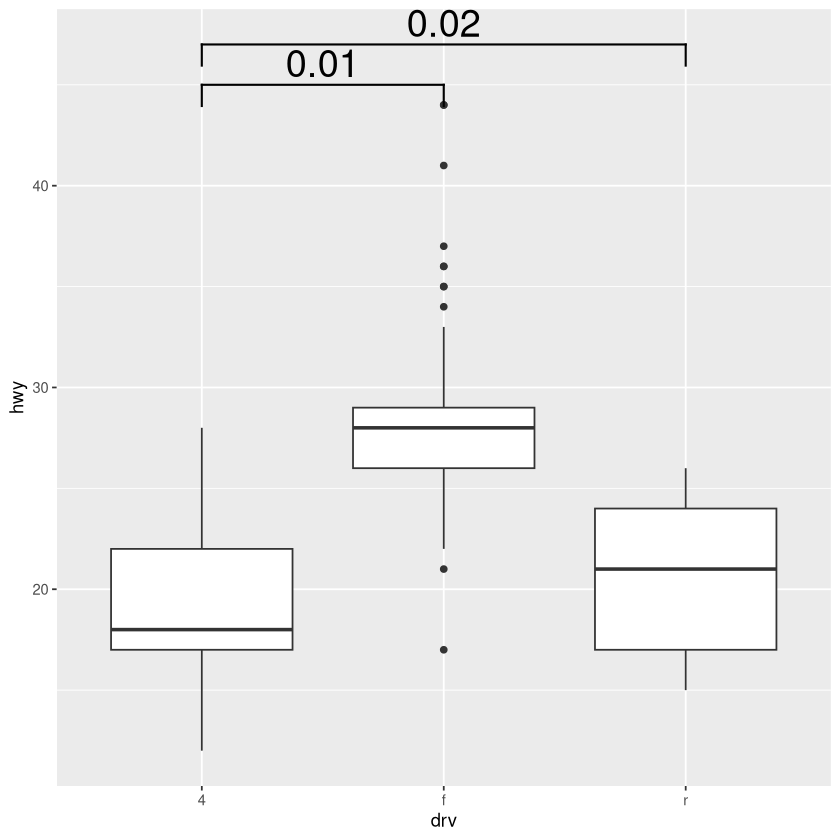

In [20]:
p + add_pvalue(p_values_df, label.size = 8)

#### `color`

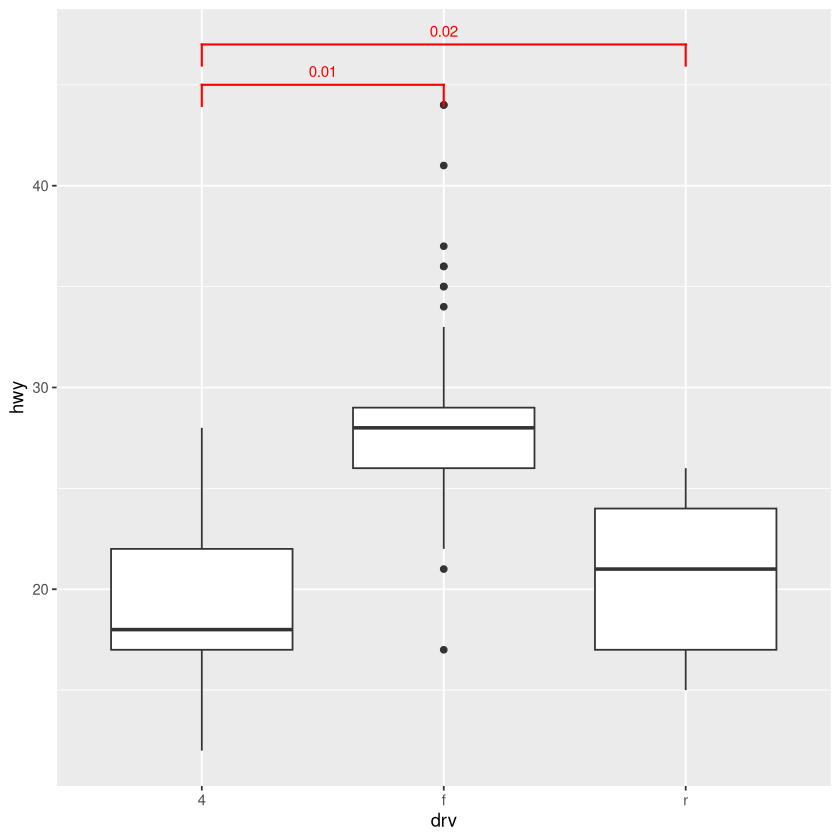

In [21]:
p + add_pvalue(p_values_df, color = "red")

#### `tip.length`

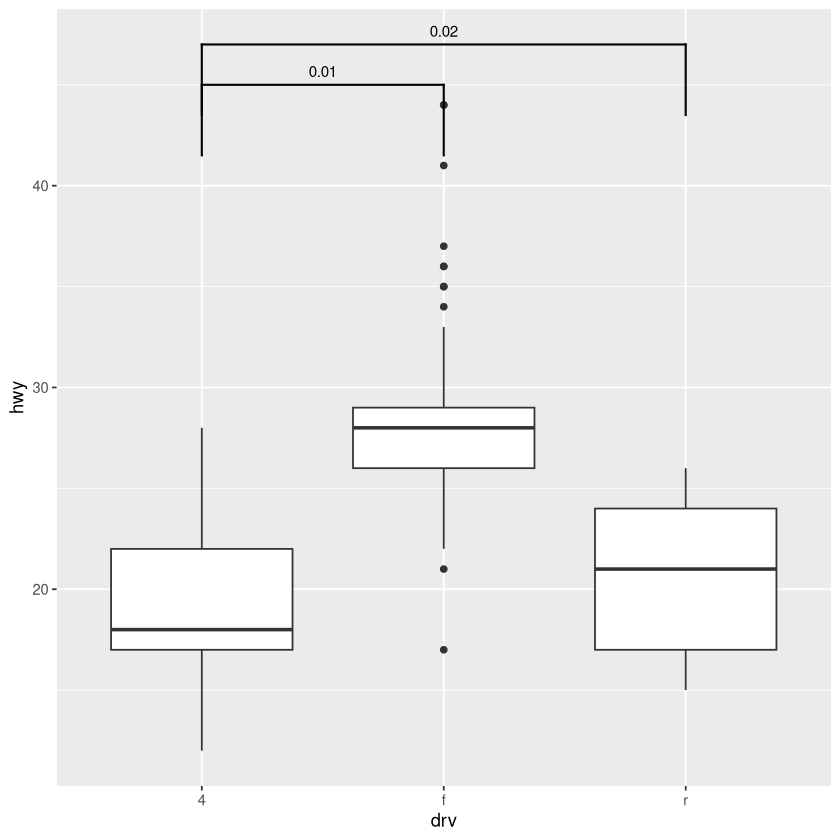

In [22]:
p + add_pvalue(p_values_df, tip.length = .1)

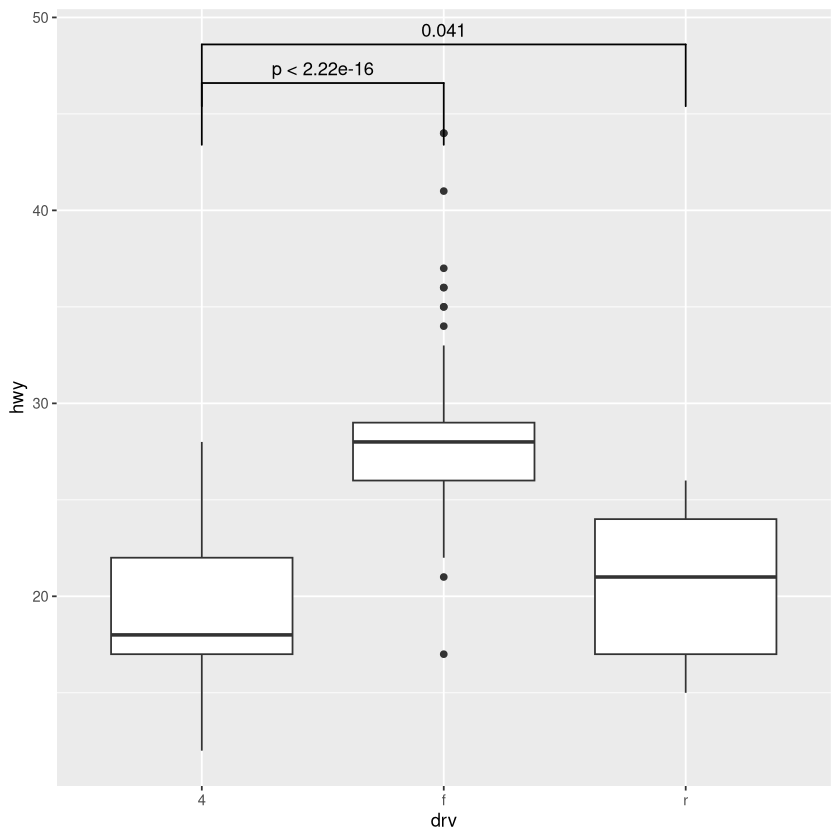

In [23]:
p + geom_signif(
    comparisons = list(
        c("4", "f"),
        c("4", "r")
    ),
    y_position = c(45, 47),
    tip_length = .1  # analogue of tip.length for ggsignif
)

#### `bracket.size`

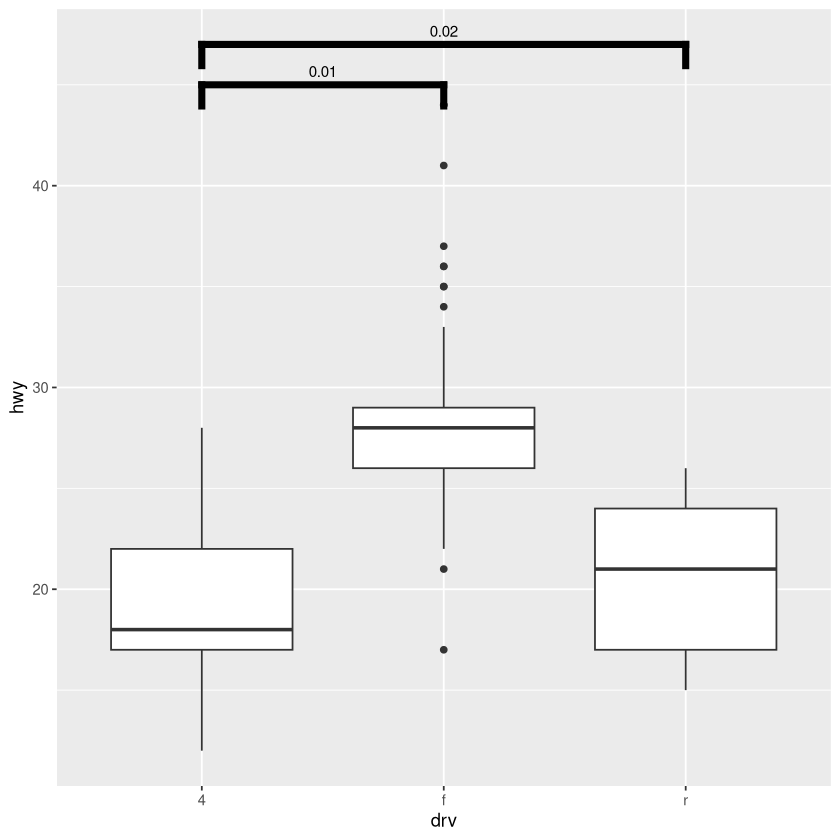

In [24]:
p + add_pvalue(p_values_df, bracket.size = 2)

#### `bracket.color`

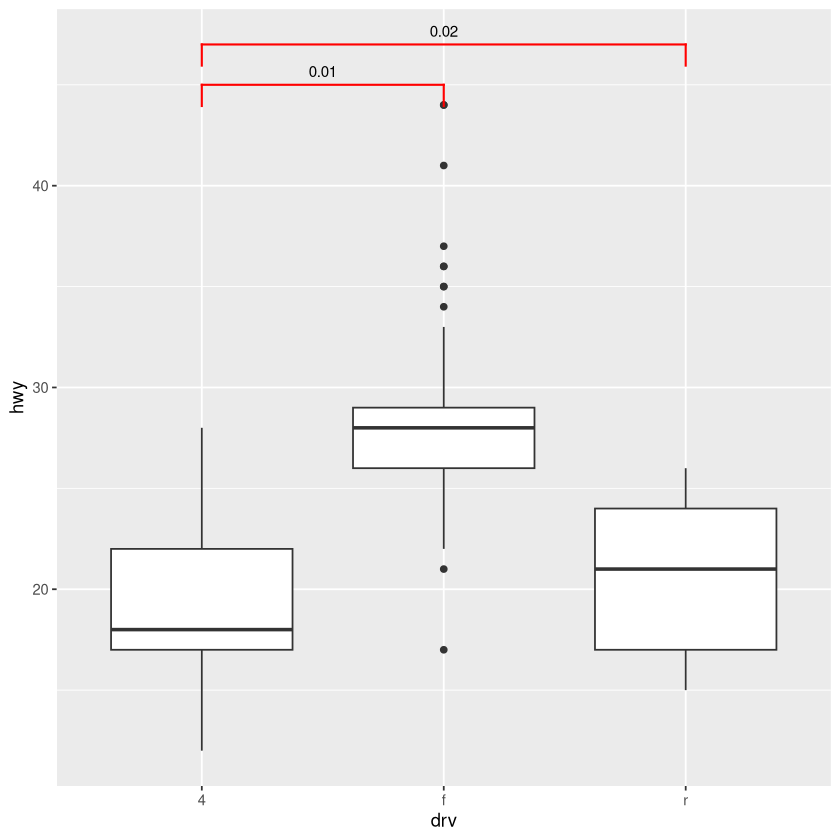

In [25]:
p + add_pvalue(p_values_df, bracket.color = "red")

#### `bracket.shorten`

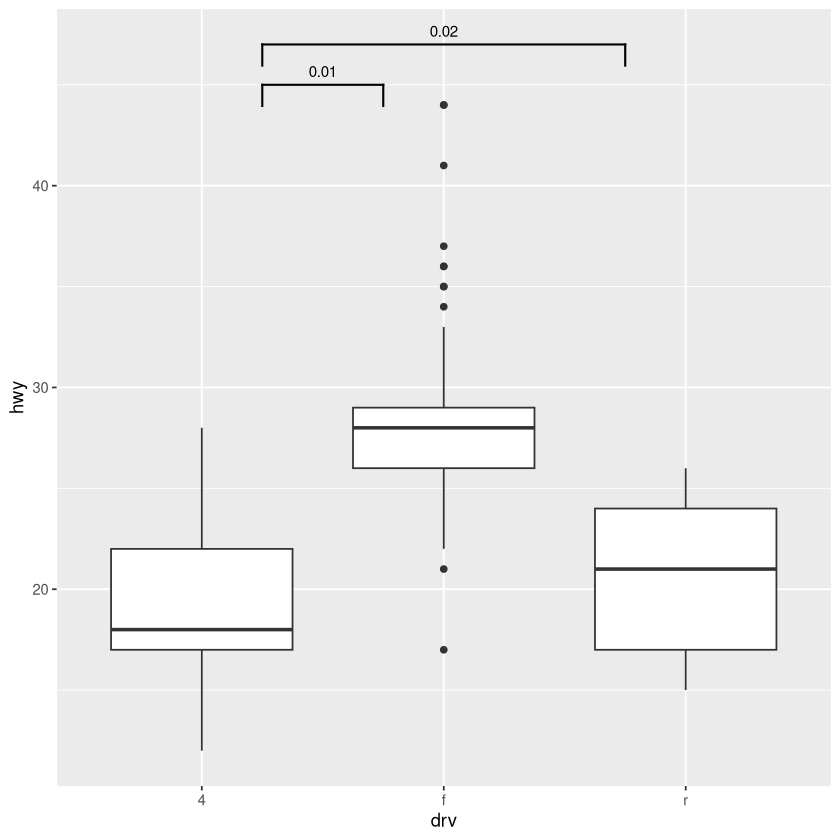

In [26]:
p + add_pvalue(p_values_df, bracket.shorten = .5)

#### `bracket.nudge.y`

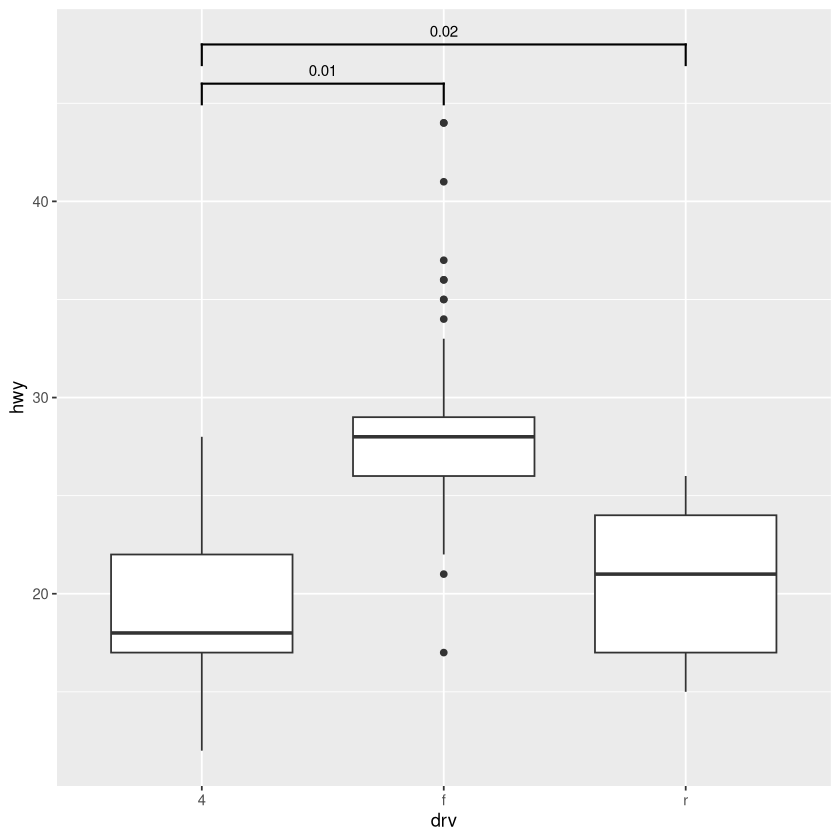

In [27]:
p + add_pvalue(p_values_df, bracket.nudge.y = 1)

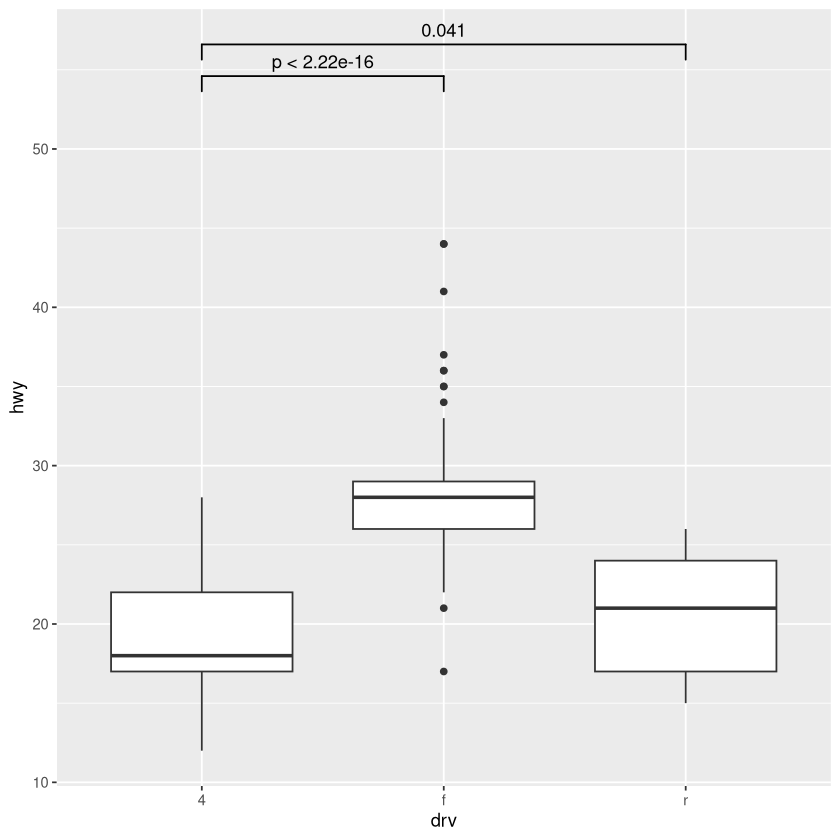

In [28]:
p + geom_signif(
    comparisons = list(
        c("4", "f"),
        c("4", "r")
    ),
    y_position = c(45, 47),
    margin_top = .3  # analogue of bracket.nudge.y for ggsignif
)

#### `step.increase`

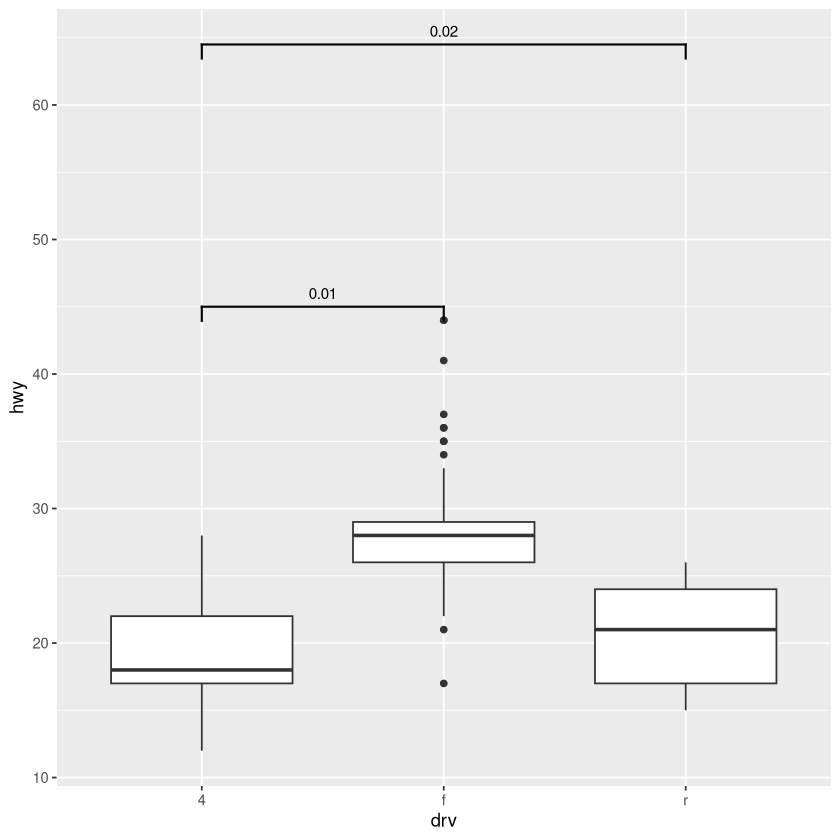

In [29]:
p + add_pvalue(p_values_df, step.increase = .5)

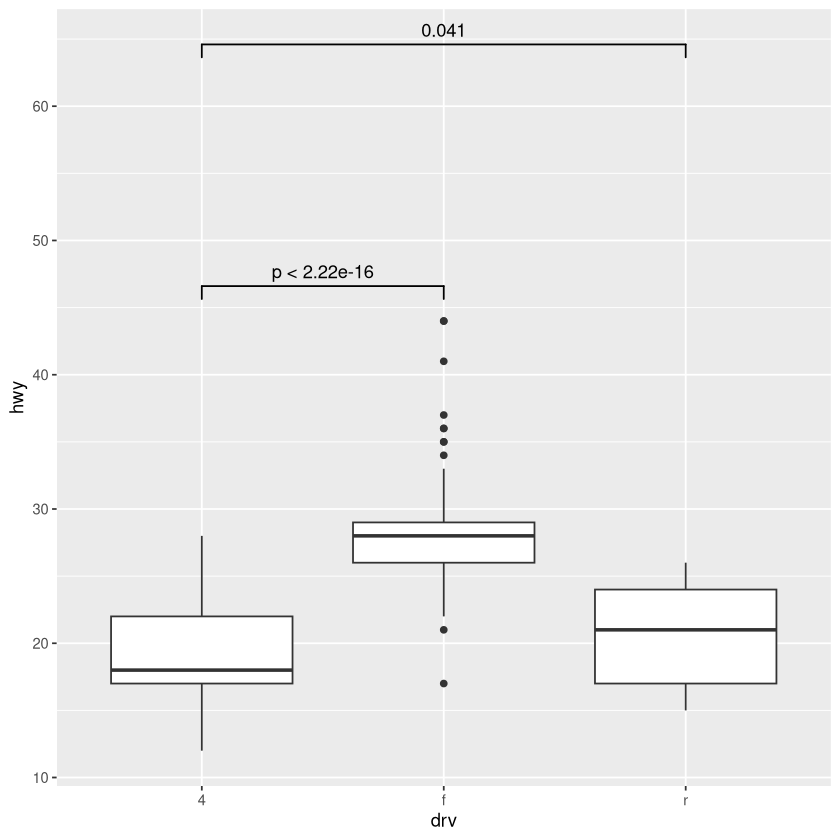

In [30]:
p + geom_signif(
    comparisons = list(
        c("4", "f"),
        c("4", "r")
    ),
    y_position = c(45, 47),
    step_increase = .5  # analogue of step.increase for ggsignif
)

#### `family`

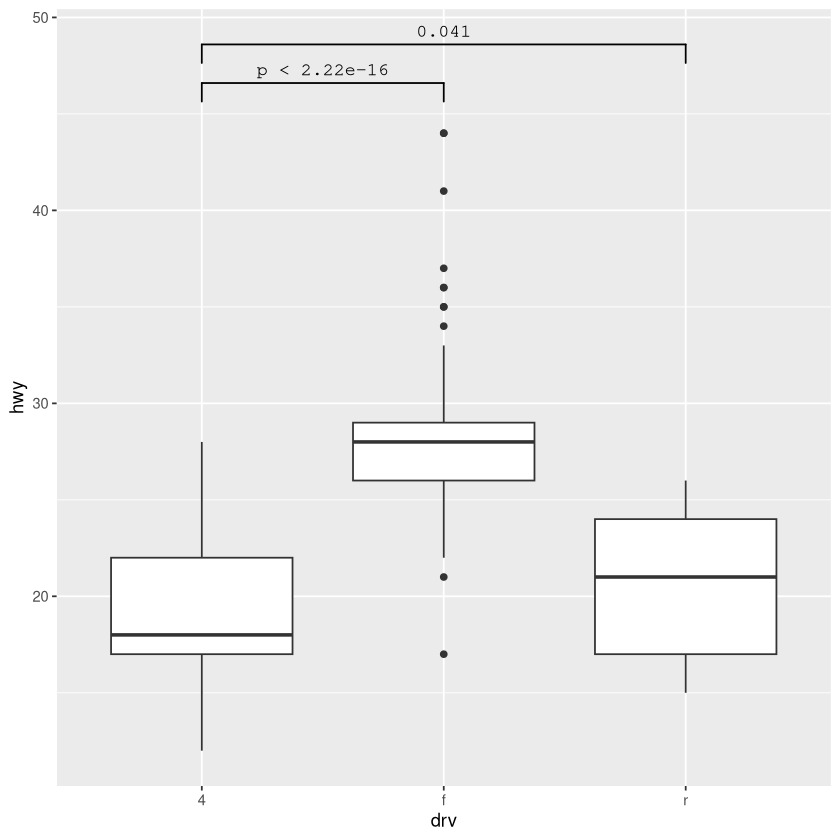

In [31]:
p + geom_signif(
    comparisons = list(
        c("4", "f"),
        c("4", "r")
    ),
    y_position = c(45, 47),
    family = "Courier"
)